In [8]:
# -*- coding: utf-8 -*-
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(7)

In [9]:
#make toy enviroment for simple Q-learning agent
env = gym.make("Taxi-v2")

[2018-02-09 13:19:57,168] Making new env: Taxi-v2


In [3]:
rewards_random = []

for episode in range(1, 1001):
    totalReward, reward = 0,0
    state = env.reset()
    done = False
    
    while not done:
        nextState, reward, done, info = env.step(random.randint(0, env.action_space.n -1))
        totalReward += reward
    rewards_random.append(totalReward)
    

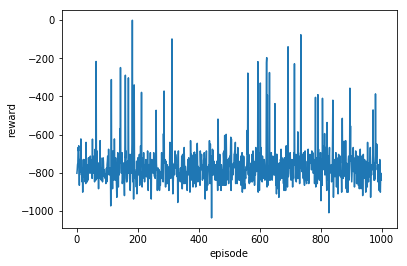

In [4]:
#plot all random rewards
plt.plot(rewards_random)
plt.ylabel('reward')
plt.xlabel('episode')
plt.show()

In [7]:
lr = 0.5

Q = np.zeros((env.observation_space.n, env.action_space.n))

rewards = []

for episode in range (1, 1001):
    
    #reset env
    s = env.reset()

    done = False    
    
    # Initializer for reward and total reward counter
    t_Reward, R = 0, 0
    
    while not done:
        action = np.argmax(Q[s])
        
        # Q-learning value iteration function
        # https://en.wikipedia.org/wiki/Q-learning
        # Q(st, at) = (1 - a) * Q(st, at) + a*( rt + y * max Q(st+1, a) )
        # Q(st, at) +=  a*( rt + y * max Q(st+1, a) - Q(st, at) )
        # Q(st, at) += a*(learned value)
        nState, R, done, info = env.step(action)
        Q[s][action] += lr*(R + np.max(Q[nState]) - Q[s, action])
        t_Reward += R
        s = nState
    rewards.append(t_Reward)
    if episode % 100 == 0:
        print('Episode {} Total Reward: {}'.format(episode, t_Reward))

Episode 100 Total Reward: -136
Episode 200 Total Reward: 10
Episode 300 Total Reward: 10
Episode 400 Total Reward: 7
Episode 500 Total Reward: 9
Episode 600 Total Reward: 6
Episode 700 Total Reward: 11
Episode 800 Total Reward: 13
Episode 900 Total Reward: 6
Episode 1000 Total Reward: 6


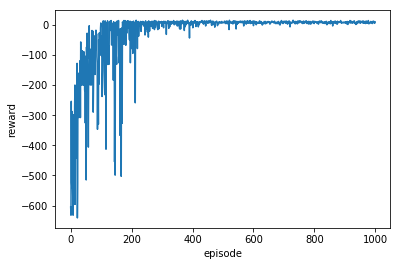

In [6]:
plt.plot(rewards)
plt.ylabel('reward')
plt.xlabel('episode')
plt.show()